In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

In [2]:
import statsmodels.api as sm
import sklearn as sk

#### 1. 데이터 준비
패션 MNIST

In [3]:
import tensorflow as tf
tf.__version__


'2.9.1'

#### tensorflow 1.x 오픈소스는 2.x에 넣을 때 수정필요

In [22]:
from tensorflow.keras.datasets.mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [23]:
# 훈련 테스트 데이터셋 확인

print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [24]:
train_input[0].shape, train_target.shape

((28, 28), (60000,))

In [25]:
train_target[0]

5

#### 훈련세트 입력 확인

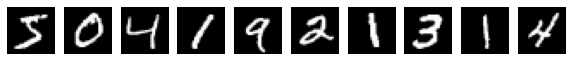

In [38]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range (10):
    axs[i].imshow(train_input[i], cmap='gray')
    axs[i].axis('off')
plt.show()

In [41]:
ret = []
for i in range(10):
    ret.append(i)

print(ret)

print([i for i in range(10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


0 1 2 3 4 5 6 7 8 9

티셔츠 바지 스웨터 드레스 코드 샌들 셔츠 스니커즈 가방 앵클부츠

In [17]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [18]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

MNIST 데이터 갯수

In [19]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

0~ 255 사이 수 0~1 사이 값으로 정수화

In [31]:
train_scaled = train_input / 255.0
train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
train_scaled.shape

(60000, 28, 28)

In [33]:
# 2차원 배열로 변환

train_scaled = train_scaled.reshape(-1, 28*28)

In [34]:
train_scaled.shape

(60000, 784)

확률적 경사하강법

SGD classifier - 딥러닝이 아니야

In [37]:
from sklearn.model_selection import cross_validate

from sklearn.linear_model import SGDClassifier


sc = SGDClassifier(loss='log', max_iter=5, random_state=42) #logistics regression을 손실 함수로
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.89725    0.885      0.88408333 0.88425    0.909     ]
0.8919166666666666


인공 신경망으로 훈련

In [42]:
from sklearn.model_selection import train_test_split

train_scaled, test_scaled, train_target, test_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)



In [43]:
print(train_scaled.shape, train_target.shape)
print(test_scaled.shape, test_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [48]:
import tensorflow.keras as keras

In [62]:
model = keras.Sequential()

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model.add(dense)


dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
사실 그냥 model = keras.models.Sequential() 이렇게만 해도 됨 or model.add(dense)

모델실행 컴파일

In [63]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# loss binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy


모델훈련

In [64]:
model.fit(train_scaled, train_target, epochs=5, verbose=1) 
# verbose 0, 1, 2 0은 아무것도 안나옴 1은 진행바 2는 에포크마다 결과

Epoch 1/5
1500/1500 [==============================] - 2s 967us/step - loss: 0.4668 - accuracy: 0.8747
Epoch 2/5
1500/1500 [==============================] - 2s 1000us/step - loss: 0.3100 - accuracy: 0.9135
Epoch 3/5
1500/1500 [==============================] - 1s 989us/step - loss: 0.2936 - accuracy: 0.9192
Epoch 4/5
1500/1500 [==============================] - 1s 990us/step - loss: 0.2861 - accuracy: 0.9224
Epoch 5/5
1500/1500 [==============================] - 1s 960us/step - loss: 0.2826 - accuracy: 0.9236


In [61]:
model.evaluate(test_scaled, test_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.2879 - accuracy: 0.9220


[0.28792256116867065, 0.921999990940094]